In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data (just need 1 file)
dfs = []
for i in range(4,6):
    dataFile = "/Users/brandonmanley/Documents/nBody/data/pred/comb10_1_"+str(i)+".csv"        
    df = pd.read_csv(dataFile, index_col=False)
    dfs.append(df)

In [ ]:
# energy conservation

offset = 4

def potentialEnergy(df, nbod,p): # sets total potential energy  (using G =1)
    
    potEnergy = 0
    for n in range(1, nbod+1):
        nthBody = str(n)

        for i in range(1, nbod+1):
            if i <= n: continue
            mass_term = 0
            x_sep = 0
            y_sep = 0
            r_sep = 0
                
            mass_term = df['m'+nthBody]*df['m'+str(i)]
            x_sep = (df['xf'+nthBody+p] - df['xf'+str(i)+p])**2
            y_sep = (df['yf'+nthBody+p] - df['yf'+str(i)+p])**2
            r_sep = (x_sep + y_sep)**0.5
            potEnergy -= mass_term / r_sep

    df['u'+p] = potEnergy
    
def kineticEnergy(df, nbod,p): # sets total kinetic energy 
    
    kinEnergy = 0
    for n in range(1, nbod+1):
        nthBody = str(n)
        kv_term = 0
        
        kv_term = df['dxf'+nthBody+p]**2 + df['dyf'+nthBody+p]**2
        kinEnergy += 0.5*df['m'+nthBody]*kv_term
    
    df['k'+p] = kinEnergy

        
def initialEnergy(df, nbod): # sets initial energy 
    
    # kinetic
    kinEnergy = 0
    for n in range(1, nbod+1):
        nthBody = str(n)
        kv_term = 0
        
        kv_term = df['dx'+nthBody]**2 + df['dy'+nthBody]**2
        kinEnergy += 0.5*df['m'+nthBody]*kv_term
    
    df['ik'] = kinEnergy
    
    # potential
    potEnergy = 0
    for n in range(1, nbod+1):
        nthBody = str(n)

        for i in range(1, nbod+1):
            if i <= n: continue
            mass_term = 0
            x_sep = 0
            y_sep = 0
            r_sep = 0
                
            mass_term = df['m'+nthBody]*df['m'+str(i)]
            x_sep = (df['x'+nthBody] - df['x'+str(i)])**2
            y_sep = (df['y'+nthBody] - df['y'+str(i)])**2
            r_sep = (x_sep + y_sep)**0.5
            potEnergy -= mass_term / r_sep

    df['iu'] = potEnergy
    df['ie'] = df['ik'] + df['iu']

    
for i in range(4, 6):
    initialEnergy(dfs[i-offset], i)
    potentialEnergy(dfs[i-offset], i, "")
    kineticEnergy(dfs[i-offset], i, "")
    
    potentialEnergy(dfs[i-offset], i, "p")
    kineticEnergy(dfs[i-offset], i, "p")
    
    dfs[i-offset]['e'] = dfs[i-offset]['k'] + dfs[i-offset]['u']
    dfs[i-offset]['ep'] = dfs[i-offset]['kp'] + dfs[i-offset]['up']

In [ ]:
def e_time(): # energy vs time plot 
    sns.set_context("poster")
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(15,10))
    for df in dfs:
        sns.lineplot(df['t'], df['e'] - df['ie'], ax=ax, ci='sd')
    ax.set(xlabel='', ylabel='')
    ax.legend(('2 bodies', '3 bodies', '4 bodies', '5 bodies'), loc='best')
#     fig.savefig("de_time_plot.pdf", format='pdf', dpi=1000)
 
e_time()

In [ ]:
# momentum conservation

def momentum(df, nbod, p):
    mom_x = 0
    mom_y = 0
    
    for n in range(1, nbod+1):
        nthBody = str(n)
        x_term = 0
        y_term = 0
        
        x_term = df['m'+nthBody]*df['dxf'+nthBody+p]
        y_term = df['m'+nthBody]*df['dyf'+nthBody+p]
        
        mom_x += x_term
        mom_y += y_term
    
    df['px'+p] = mom_x
    df['py'+p] = mom_y
    df['p'+p]  = (df['px'+p]**2 + df['py'+p]**2)**0.5
        

def initialMomentum(df, nbod):
    mom_x = 0
    mom_y = 0
    
    for n in range(1, nbod+1):
        nthBody = str(n)
        x_term = 0
        y_term = 0
        
        x_term = df['m'+nthBody]*df['dx'+nthBody]
        y_term = df['m'+nthBody]*df['dy'+nthBody]
        
        mom_x += x_term
        mom_y += y_term
    
    df['ipx'] = mom_x
    df['ipy'] = mom_y
    df['ip'] = (df['ipx']**2 + df['ipy']**2)**0.5

for i in range(4, 6):
    initialMomentum(dfs[i-offset], i)
    
    momentum(dfs[i-offset], i, "")
    momentum(dfs[i-offset], i, "p")

In [ ]:
def p_time(): # momentum vs time plot
    sns.set_context("poster")
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(15,10))
    for df in dfs:
        sns.lineplot(df['t'], df['p'] - df['ip'], ax=ax, ci='sd')
    ax.set(xlabel='', ylabel='')
    ax.legend(('2 bodies', '3 bodies', '4 bodies', '5 bodies'), loc='best')
    fig.savefig("dp_time_plot.pdf", format='pdf', dpi=1000)

p_time()

In [ ]:
for df in dfs:
    df['de'] = df['e'] - df['ie']
    df['dp'] = df['p'] - df['ip']
    
    df['dep'] = df['ep'] - df['ie']
    df['dpp'] = df['pp'] - df['ip']

In [ ]:
dfs[0]

In [ ]:
# metric v time histogram
def perError(n):
    fig, ax = plt.subplots(figsize=(15,10))
    sns.set_context("poster")
    sns.lineplot(dfs[n-4]['t'], np.abs(dfs[n-4]['dep']/dfs[n-4]['ie']), ax=ax, ci=None)
    sns.lineplot(dfs[n-4]['t'], np.abs(dfs[n-4]['de']/dfs[n-4]['ie']), ax=ax, ci=None)
    ax.set(yscale='log', ylabel='% Error in Energy', xlabel="Time")
    ax.legend(("NN", "Brutus"), loc='best', facecolor="white", edgecolor="white", fontsize=34)
    fig.savefig("plots/energy_errorVStime_comp_{0}.pdf".format(n), dpi=1000)


def perMomentum(n):
    fig, ax = plt.subplots(figsize=(15,10))
    sns.set_context("poster")
    sns.lineplot(dfs[n-4]['t'], np.abs(dfs[n-4]['dpp']/dfs[n-4]['ip']), ax=ax, ci=None)
    sns.lineplot(dfs[n-4]['t'], np.abs(dfs[n-4]['dp']/dfs[n-4]['ip']), ax=ax, ci=None)
    ax.set(yscale='log', ylabel='% Error in Momentum', xlabel="Time")
    ax.legend(("NN", "Brutus"), loc='best', facecolor="white", edgecolor="white", fontsize=34)
    fig.savefig("plots/momentum_errorVStime_comp_{0}.pdf".format(n), dpi=1000)
    
perError(4)
perMomentum(4)
perError(5)
perMomentum(5)

In [ ]:
# calculate % error as a function of separation

def calc_avg_sep(n):
    
    df = dfs[n-4]
    avg_sep = 0
    
    for i in range(1, n+1):
        for j in range(1, n+1):
            if j <= i: continue
            x_term = (df['xf'+str(i)] - df['xf'+str(j)])
            y_term = (df['yf'+str(i)] - df['yf'+str(j)])
            avg_sep += (x_term**2 + y_term**2)**0.5
            
    avg_sep /= (0.5*(n)*(n-1))
    df['avg_sep'] = avg_sep
    
def calc_dist_error(n):
    df = dfs[n-4]
    per_error = 0
    
    for i in range(1, n+1):
        per_error += np.abs((df['xf'+str(i)] - df['xf'+str(i)+'p'])/df['xf'+str(i)])
    
    df['dist_err'] = per_error
    
calc_dist_error(4)
calc_dist_error(5)

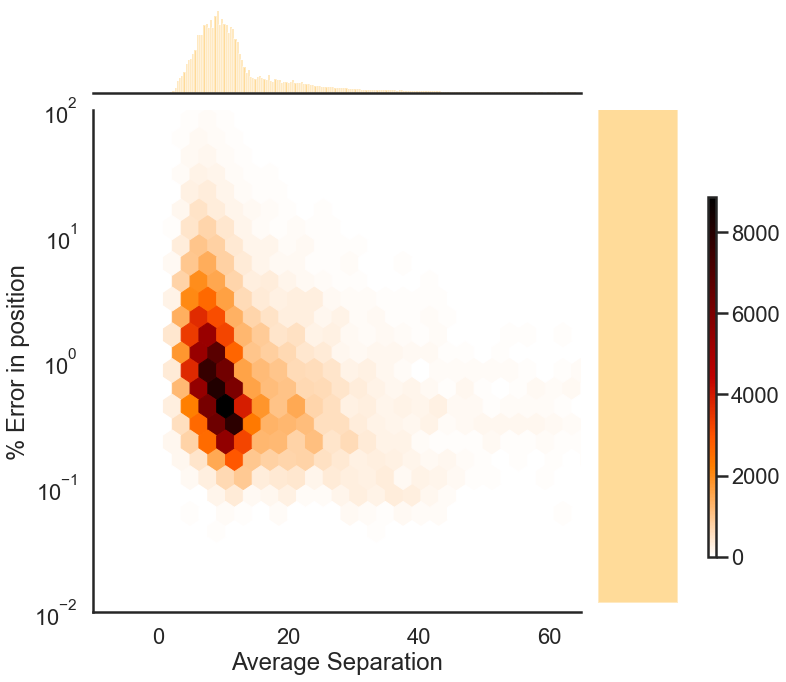

In [270]:
# plot % error in distance as a function of separation

def dist_error(n):
    df = dfs[n-4] 

    sns.set_context("poster")
    g = sns.jointplot(df['avg_sep'], df['dist_err'], 
                  kind='hex', height=10, yscale="log", 
                  xlim=(-10, 65), ylim=(1e-2,1e2),
                 marginal_kws=dict(bins=400, color="orange"), cmap='gist_heat_r')
    g.ax_marg_y.set_axis_off()
    g.set_axis_labels("Average Separation", "% Error in position")
    cax = g.fig.add_axes([1, 0.20, .01, 0.5])
    cb = plt.colorbar(cax=cax)
    g.savefig("plots/pos_errorVSavg_separation{0}.pdf".format(n), dpi=1000)
    
dist_error(5)